In [1]:
import numpy as np

In [2]:
import pandas as pd

In [5]:
telcom = pd.read_csv("/Users/admin/Desktop/telco.csv", na_values = " ")

In [7]:
telcom.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
telcom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
telcom = telcom.fillna(0)

In [10]:
telcom.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
telcom = telcom.drop(["customerID"], axis = 1)

In [12]:
telcom.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
column = telcom.columns.drop(['tenure', "SeniorCitizen", "MonthlyCharges", "TotalCharges"])

In [16]:
telcom_new = pd.get_dummies(telcom, columns = column , drop_first = True)

In [17]:
telcom_new.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


In [18]:
telcom_new.groupby(["Churn_Yes"]).count()/telcom.shape[0]*100

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
Churn_Yes,,,,,,,,,,,,,,,,,,,,,
0,73.463013,73.463013,73.463013,73.463013,73.463013,73.463013,73.463013,73.463013,73.463013,73.463013,...,73.463013,73.463013,73.463013,73.463013,73.463013,73.463013,73.463013,73.463013,73.463013,73.463013
1,26.536987,26.536987,26.536987,26.536987,26.536987,26.536987,26.536987,26.536987,26.536987,26.536987,...,26.536987,26.536987,26.536987,26.536987,26.536987,26.536987,26.536987,26.536987,26.536987,26.536987


In [19]:
target = telcom_new["Churn_Yes"]

In [20]:
variable = telcom_new.drop(["Churn_Yes"],axis =1)

In [21]:
variable.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [22]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(variable, target, test_size = 0.30, random_state = 42)

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
knn = KNeighborsClassifier()

In [28]:
parameters = {"n_neighbors": np.arange(1, 100)}

In [29]:
knnclassifier = GridSearchCV(knn, parameters, cv = 10)

In [30]:
knnclassifier.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [31]:
print(knnclassifier.best_score_)

0.7797160243407708


In [32]:
print(knnclassifier.best_params_)

{'n_neighbors': 29}


In [33]:
print(knnclassifier.cv_results_)

{'mean_fit_time': array([0.00459168, 0.00478094, 0.00401592, 0.00369921, 0.00371263,
       0.0038218 , 0.00359788, 0.00354183, 0.00391629, 0.00368319,
       0.00353179, 0.00384917, 0.00365047, 0.00373104, 0.00373085,
       0.00377386, 0.00412307, 0.00370574, 0.00419152, 0.00421119,
       0.00463197, 0.00519879, 0.00538914, 0.00426702, 0.00388651,
       0.00372853, 0.00406361, 0.0039386 , 0.00385885, 0.00383937,
       0.00363097, 0.00399148, 0.00385365, 0.00356698, 0.00376399,
       0.00354958, 0.00381465, 0.00366197, 0.00371504, 0.00347342,
       0.00388596, 0.00380323, 0.00388627, 0.00373421, 0.00363524,
       0.00366478, 0.00417993, 0.00367177, 0.00405176, 0.00359395,
       0.0037662 , 0.0036325 , 0.00366199, 0.00376647, 0.00358882,
       0.0036402 , 0.0037668 , 0.00375974, 0.00358822, 0.003756  ,
       0.0062777 , 0.00570872, 0.00489943, 0.00567858, 0.00410376,
       0.00633569, 0.00407605, 0.00422709, 0.00427313, 0.00411041,
       0.00470414, 0.00413921, 0.00408869, 0

In [34]:
results = pd.DataFrame(knnclassifier.cv_results_)

In [35]:
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004592,0.002268,0.042636,0.024019,1,{'n_neighbors': 1},0.720081,0.701826,0.707911,0.709939,0.677485,0.705882,0.716024,0.683570,0.703854,0.716024,0.704260,0.013139,99
1,0.004781,0.002018,0.046724,0.010612,2,{'n_neighbors': 2},0.754564,0.752535,0.752535,0.758621,0.736308,0.748479,0.756592,0.726166,0.746450,0.750507,0.748276,0.009447,97
2,0.004016,0.000814,0.043436,0.002571,3,{'n_neighbors': 3},0.758621,0.752535,0.748479,0.728195,0.730223,0.748479,0.764706,0.711968,0.718053,0.740365,0.740162,0.016614,98
3,0.003699,0.000348,0.048261,0.001459,4,{'n_neighbors': 4},0.789047,0.758621,0.772819,0.770791,0.742394,0.758621,0.766734,0.750507,0.744422,0.768763,0.762272,0.013571,95
4,0.003713,0.000395,0.050335,0.003366,5,{'n_neighbors': 5},0.795132,0.758621,0.774848,0.748479,0.736308,0.756592,0.770791,0.748479,0.744422,0.748479,0.758215,0.016598,96


In [36]:
import matplotlib.pyplot as plt

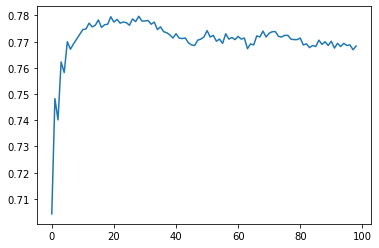

In [37]:
plt.plot(results["mean_test_score"])

In [38]:
knnclassifier.fit(X_test, y_test)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [39]:
print(knnclassifier.best_score_)

0.7827438969864973


In [40]:
print(knnclassifier.best_params_)

{'n_neighbors': 23}


In [41]:
results = pd.DataFrame(knnclassifier.cv_results_)

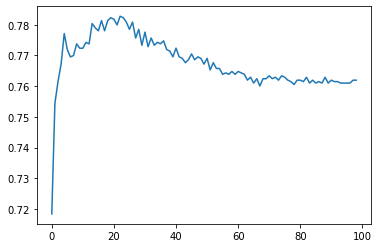

In [42]:
plt.plot(results["mean_test_score"])

In [43]:
y_pred = knnclassifier.predict(X_test)

In [45]:
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=uint8)